In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report

In [413]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn') 

**Задание**

Цель: применить на практике базовые ансамблевые методы

Описание задания:
В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)
Этапы работы:

1.Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

2.Подготовьте датасет к обучению моделей.
a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html, 
preprocessing.LabelEncoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. 
Старайтесь не использовать для этой задачи циклы.
b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

3.Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

4.Обучите дерево решений на обучающем множестве. Используйте следующие модели:
a) tree.DecisionTreeClassifier https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
b) ensemble.RandomForestClassifier https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

5.Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

6.Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

7.Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
a) Повторите п. 5

8.Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html. Используйте ensemble.StackingClassifier.https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html 
a) Повторите п. 5

9.Сформулируйте выводы по проделанной работе.
a) Сравните метрики построенных моделей.
b) Напишите свое мнение, какая модель наилучшая и почему.

Для получения зачета по этому домашнему заданию, минимально, должны быть обучены следующие модели: дерево решений, стекинг трех моделей. В данных должны быть обработаны категориальные значения.

Результат: получены знания по использованию базовых ансамблевых методов.

**Форма выполнения**:
* ссылка на Jupyter Notebook, загруженный на GitHub
* ссылка на Google Colab
* файл с расширением .ipynb

**Инструменты**:
* Jupyter Notebook/Google Colab;
* GitHub.
* данные с сайта https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
pd.get_dummies, preprocessing.LabelEncoder
модели tree.DecisionTreeClassifier https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html и ensemble.RandomForestClassifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
metrics.classification_report https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
ensemble.BaggingClassifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
svm.LinearSVC https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
ensemble.StackingClassifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html


**Рекомендации к выполнению**:

* Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
* У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
* Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
* Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

# 1.Загрузка данных

In [414]:
df = pd.read_csv('../Sources/heart.csv', sep=',')

**Описание датасета**

Статистические данные о группах домов в Калифорнии, основанные на переписи 1990 года.   


**age**: age of person - возраст пациента [годы]

**Sex**: Male or Female - пол пациента [M: мужчина, F: женщина]

**ChestPinType** : any pain in the area of your chest - тип боли в груди

**ASY** = Asymptomatic - бесимптомная

**NAP** = Non Anginal pain - неангинальная боль

**ATA** = Atypical Angina - атипичная стенокардия

**TA** = Typical Angina - типичная стенокардия

**Restin BP** : Resting Blood Pressure (Hypertension) - артериальное давление в состоянии покоя [мм рт. ст.]

**Cholesterol** : Cholesterol level in the blood - уровень холестерина в крови 

**fasting BS** : A fasting blood sugar (FBS) level is the result of a blood sample taken after a patient fasts for at least eight hours, 1 = if FastingBS > 120 mg/dl, 0 = otherwise - Уровень сахара в крови натощак [1: если уровень сахара в крови натощак> 120 мг / дл, 0: в противном случае]


**Resting ECG**:is a non-invasive test that can detect abnormalities including arrhythmias, evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks - это неинвазивный тест, который может выявить аномалии, включая аритмии, признаки ишемической болезни сердца, гипертрофию левого желудочка и блокаду ножек пучка Гиса.


**MaxHR** : Maximum Heart Rate - достигнутая максимальная частота сердечных сокращений [числовое значение от 60 до 202]

**ExerciseAngina** : If person do angina exercise or not, Y = Yes, N = No - Стенокардия, вызванная физической нагрузкой [Y: Да, N: Нет]

**Oldpeak**: ST depression induced by exercise relative to rest - ST числовое значение, измеренное в депрессии

**ST_Slope** : The ST segment shift relative to exercise-induced increments in heart rate - наклон сегмента ST при максимальной нагрузке [Вверх: наклон вверх, плоский: плоский, вниз: наклон вниз]

**HeartDisease** : output class - выходной класс 1: болезнь сердца, 0: норма


In [415]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [416]:
df[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


# EDA

In [417]:
df.shape

(918, 12)

In [418]:
172/918

0.18736383442265794

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [420]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [421]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [422]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


### Посмотрим на распределение признаков и таргета

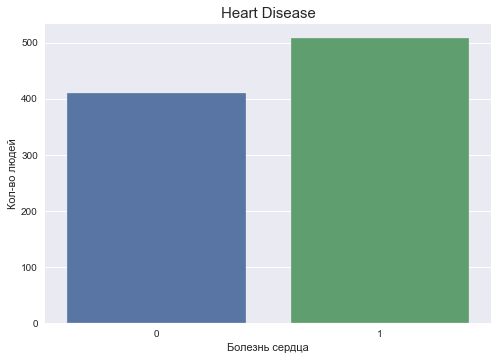

In [423]:
sns.countplot(df["HeartDisease"])
plt.title("Heart Disease",size = 15)
plt.xlabel('Болезнь сердца')
plt.ylabel('Кол-во людей')
plt.show()


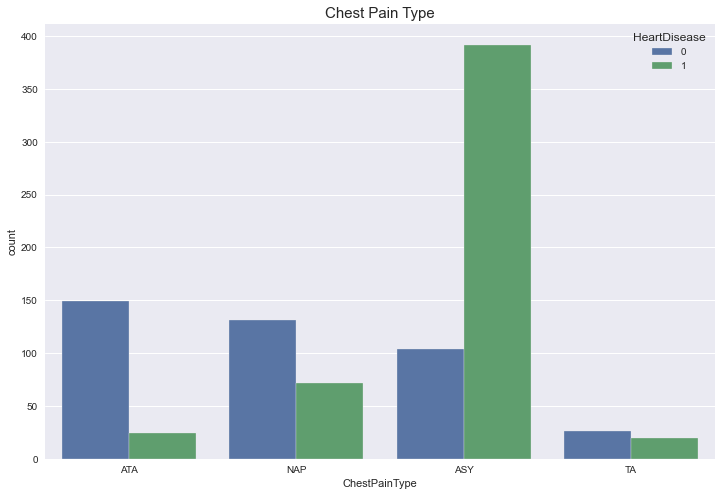

In [424]:
plt.figure(figsize= (12,8))
sns.countplot(df["ChestPainType"], hue= df["HeartDisease"])
plt.title("Chest Pain Type",size = 15)
plt.show()

Преобладаюет бесимптомная болезнь сердца

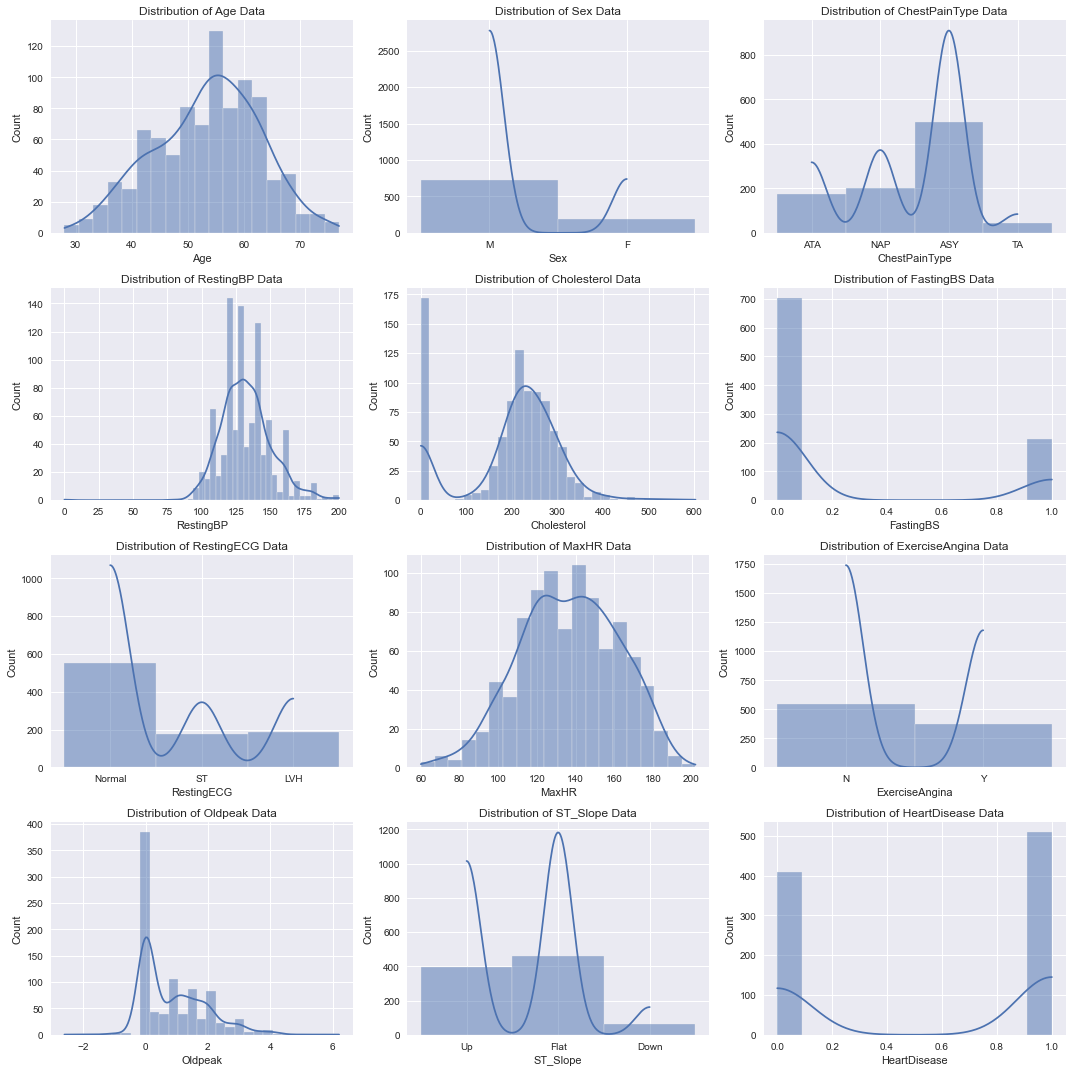

In [425]:
plt.figure(figsize=(15,15))

for i,col in enumerate(df.columns, 1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

### Сформируем возрастные группы

In [426]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bins_names = ['0-10', '10-20',  '20-30', '40-50' '50-60', '60-70', '70-80', '80-90', '90-100', '100 +']
df['age_groups'] = pd.cut(df['Age'], bins=bins)

In [427]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_groups
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,"(30, 40]"
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,"(40, 50]"
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,"(30, 40]"
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,"(40, 50]"
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,"(50, 60]"


In [428]:
df_age_groups = df.groupby('age_groups').agg(
                             numbers_of_heart_disease      = ('HeartDisease', 'sum'),
                             Total_observation = ('HeartDisease', 'count')
                            ).reset_index().sort_values(by='numbers_of_heart_disease', ascending=False)                              
                                          
df_age_groups['%'] = round(df_age_groups['numbers_of_heart_disease'] / df_age_groups['Total_observation'] * 100, 2)
df_age_groups.sort_values(by='%', ascending=False)

,age_groups,numbers_of_heart_disease,Total_observation,%
6,"(60, 70]",145,197,73.60
7,"(70, 80]",16,24,66.67
5,"(50, 60]",222,381,58.27
4,"(40, 50]",93,223,41.70
3,"(30, 40]",32,88,36.36
2,"(20, 30]",0,5,0.00
0,"(0, 10]",0,0,NaN
1,"(10, 20]",0,0,NaN
8,"(80, 90]",0,0,NaN
9,"(90, 100]",0,0,NaN


In [429]:
# В процентном соотношение кол-во больных и здоровых в каждой группе

stats_age_groups = pd.crosstab(df['age_groups'], df.HeartDisease, normalize='index')* 100
stats_age_groups

HeartDisease,0,1
age_groups,,
"(20, 30]",100.000000,0.000000
"(30, 40]",63.636364,36.363636
"(40, 50]",58.295964,41.704036
"(50, 60]",41.732283,58.267717
"(60, 70]",26.395939,73.604061
"(70, 80]",33.333333,66.666667


* Из распределения по возрастным группам видим, что самая опасная группа 60-70.
* Группа 70-80 нерепрезентативна, т.к. в нее попало всего лишь 24 наблюдения. 
* При переходе от возрастной группы (50-60] к (60-70] доля больных сердечным заболеванием возрастает с 58.27% до 73.60% на 15.32%

<Figure size 1440x720 with 0 Axes>

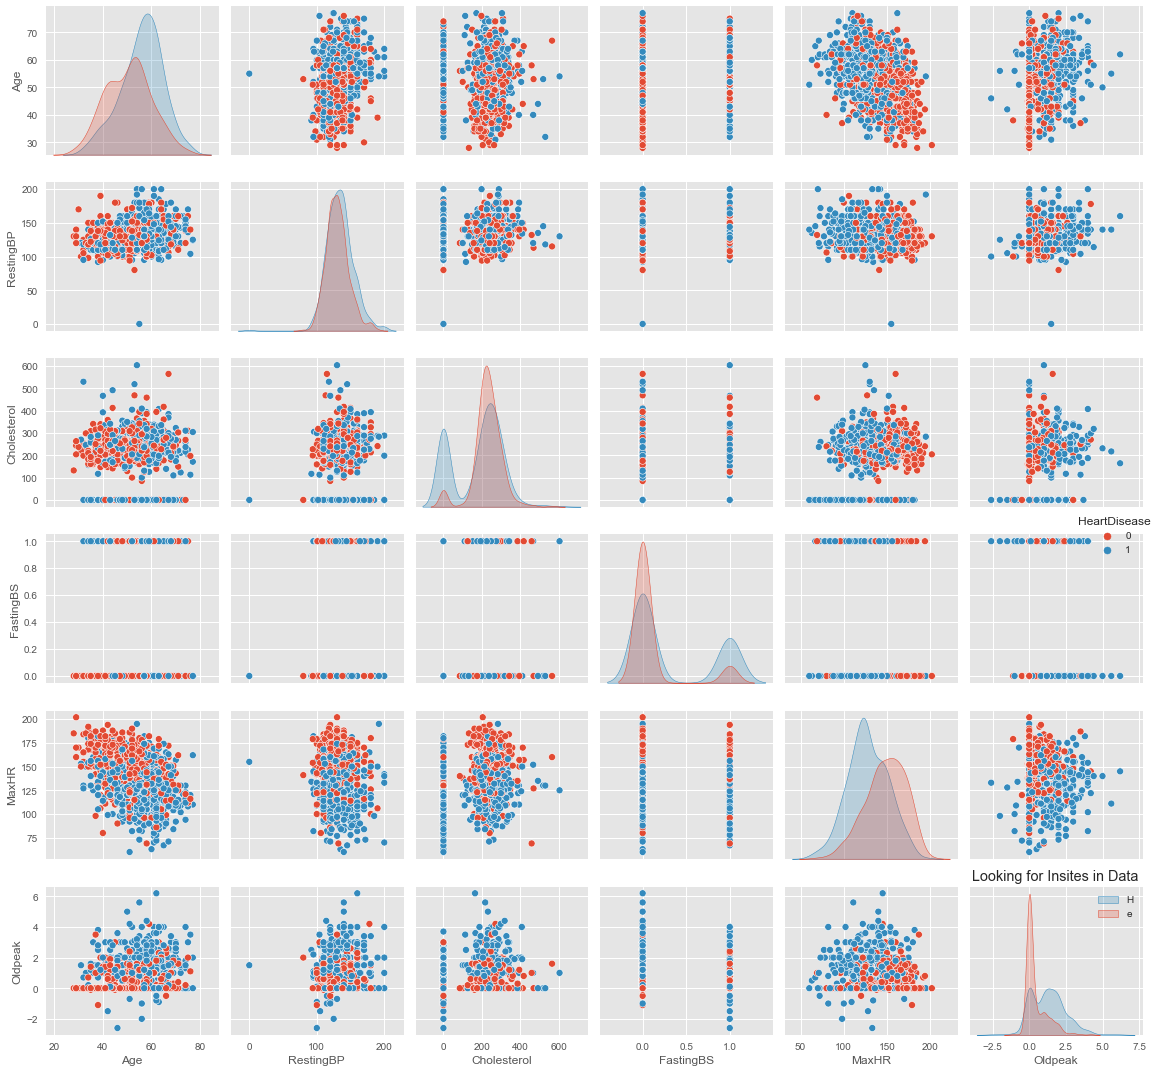

In [430]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
sns.pairplot(df, hue='HeartDisease')
plt.title('Looking for Insites in Data')
plt.legend('HeartDisease')
plt.tight_layout()
plt.show()

### Рассмотрим более детально следующие распределения:


<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

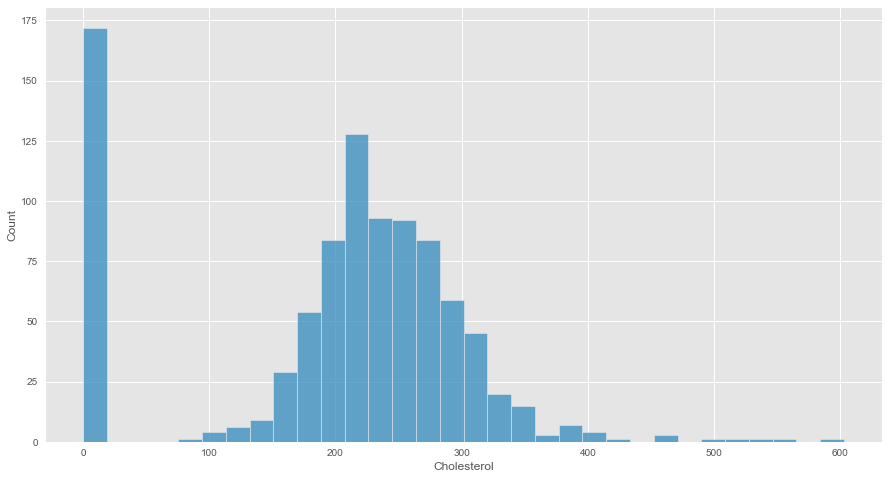

In [431]:
plt.figure(figsize=(15,8))
sns.histplot(df['Cholesterol'])

Как видно из графика, наиболее частое значение 0 - это отсутствие показани по уровню холестерина в крови.

Оценим, какой объем пропущенных значений

In [432]:
df[df.Cholesterol == 0].head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_groups
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1,"(60, 70]"
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1,"(30, 40]"
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1,"(60, 70]"
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1,"(40, 50]"
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1,"(50, 60]"


In [433]:
miss_values = df[df.Cholesterol == 0].shape[0]
total_rows = df.shape[0]
print('Пропущено: {} записи, что составляет {:.2f}% от общего объема дата сета'.format(miss_values, 100 * miss_values / total_rows)) 

Пропущено: 172 записи, что составляет 18.74% от общего объема дата сета


In [434]:
# Заменим 0 пропусками:
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)

### Работа с пропусками

Так как пропущенных значений очень много, заменим пропущенные значения медианой в разрезе возрастной группы, группы артериального давления и признака болезни сердца.

In [435]:
df['Cholesterol'] = \
df['Cholesterol'].fillna(df.groupby(['age_groups', 'RestingECG', 'HeartDisease' ])['Cholesterol'].transform('median'))                                  

In [436]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       1
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
age_groups        0
dtype: int64

In [437]:
# При группировки по 3 полям осталась лишь одна запись, у которой в свою очередь отсутствует choleserol. 
# Удалим эту одиночную запись.
df = df.dropna()

In [438]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
age_groups        0
dtype: int64

In [440]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

У людей имеющих проблемы с сердцем медианный возраст выше, чем у здоровых людей.

In [441]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age", color='Sex')
fig.show()

Видим, что среди категории, имеющих проблемы с сердецем, медианный возраст женщин немного превышает возраст мужчин. Это косвенно свидетельствует о том, что у мужчины раньше повляются проблемы с сердцем.

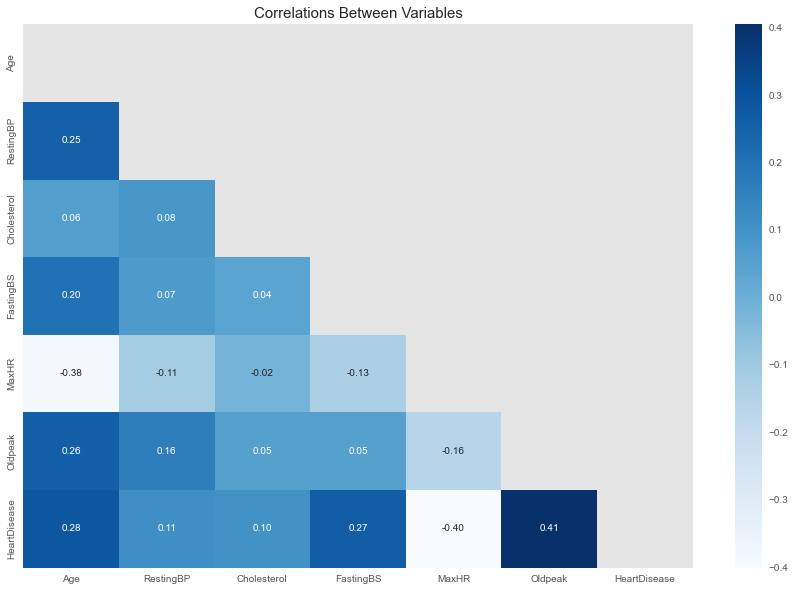

In [442]:
plt.figure(figsize= (15,10))
mask=np.triu(corr)
sns.heatmap(df.corr(), annot= True, fmt= ".2f", cmap="Blues", mask=mask)
plt.title("Correlations Between Variables",size = 15)
plt.show()

Наиболее значимая линейная корреляция наблюдается с:

**Отрицательная**

* максимальной частотой сердечных сокращений [числовое значение от 60 до 202] 


**Положительная**
* уровнем дипрессии
* уровнем сахара в крови
* артериальное давление в состоянии покоя
* возраст
* уровень холестерина в крови


# Подготовьте датасет к обучению моделей

In [407]:
# Преобразуем категориальные переменные к типу данных "category"

cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for col in cat_cols:
    df[col] = df[col].astype("category")
df.info()

# cat_cols = [col for col in df.columns if str(df[col].dtypes) in ['category', 'object', 'bool']]
# for col in df.columns[df.dtypes == 'object']:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             917 non-null    int64   
 1   Sex             917 non-null    category
 2   ChestPainType   917 non-null    category
 3   RestingBP       917 non-null    int64   
 4   Cholesterol     917 non-null    float64 
 5   FastingBS       917 non-null    int64   
 6   RestingECG      917 non-null    category
 7   MaxHR           917 non-null    int64   
 8   ExerciseAngina  917 non-null    category
 9   Oldpeak         917 non-null    float64 
 10  ST_Slope        917 non-null    category
 11  HeartDisease    917 non-null    int64   
 12  age_groups      917 non-null    category
dtypes: category(6), float64(2), int64(5)
memory usage: 64.1 KB


In [408]:
df.describe(include='category').T

,count,unique,top,freq
Sex,917,2,M,724
ChestPainType,917,4,ASY,495
RestingECG,917,3,Normal,552
ExerciseAngina,917,2,N,546
ST_Slope,917,3,Flat,460
age_groups,917,6,"(50, 60]",381


In [409]:
df['Sex'].nunique() 

2

In [410]:
# Число уникальных значений в категориальных переменных 

df[cat_cols].nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [411]:
le = LabelEncoder()

for col in cat_cols:
    if df[col].nunique() > 2:
        df[col] = pd.get_dummies(data=df, columns=[col])
    else:
        df[col] = le.fit_transform(df[col])

ValueError: Columns must be same length as key

In [ ]:
df.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# le = LabelEncoder()

# df["Sex"] = le.fit_transform(df["Sex"])

In [131]:
le = LabelEncoder()

for col in cat_cols:
    if cat_cols[col].value_counts().count() > 2:
        cat_cols = pd.get_dummies(cat_cols, columns=[col], prefix=[col]) # One Hot Encoder
    else:
        cat_cols[col] = label_encoder.fit_transform(cat_cols[col].astype(str)) # Label Encoder
        
df = pd.concat([num_cols,cat_cols], axis=1)
df.head()

TypeError: list indices must be integers or slices, not str

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline
init_notebook_mode(connected= True)

In [ ]:
df.head()

In [ ]:
df.Sex.value_counts()

In [ ]:
chest_le = LabelEncoder()
df["ChestPainType"] = chest_le.fit_transform(df["ChestPainType"])

In [ ]:
chest_le